### 1.Load package

In [1]:
library(ggplot2)
#require(ggplot2)

Warning message:
"package 'ggplot2' was built under R version 3.3.2"

### 2.Get help

In [2]:
?read.delim
#??base::delim  # search for a specific library

### 3.Import Data
<p> Try to read csv from a url

In [2]:
data.file="http://www.yurulin.com/class/spring2014_datamining/data/ml_hackers/01_heights_weights_genders.csv"
heights.weights = read.csv(data.file, header=T, sep=",")
# have header(column names), seperator is comma
dim(heights.weights)

[1] 10000     3

### 4.Summary Data

In [5]:
summary(heights.weights)

    Gender         Height          Weight     
 Female:5000   Min.   :54.26   Min.   : 64.7  
 Male  :5000   1st Qu.:63.51   1st Qu.:135.8  
               Median :66.32   Median :161.2  
               Mean   :66.37   Mean   :161.4  
               3rd Qu.:69.17   3rd Qu.:187.2  
               Max.   :79.00   Max.   :270.0  

In [7]:
#mean(heights.weights[,2])
#median(heights.weights$Height)
#max(heights.weights$Height)
quantile(heights.weights$Height,probs=seq(0,1,by=0.2)) #every 20%

0%      20%      40%      60%      80%     100% 
54.26313 62.85901 65.19422 67.43537 69.81162 78.99874

In [9]:
#sd(heights.weights[,2])
# Tabulation
t1=tapply(heights.weights$Height, INDEX=heights.weights$Gender,
          FUN=mean, na.rm=T)
t1

Female     Male 
63.70877 69.02635

In [11]:
# Correlation
cor(heights.weights$Height,heights.weights$Weight)

[1] 0.9247563

### 5.Visualization

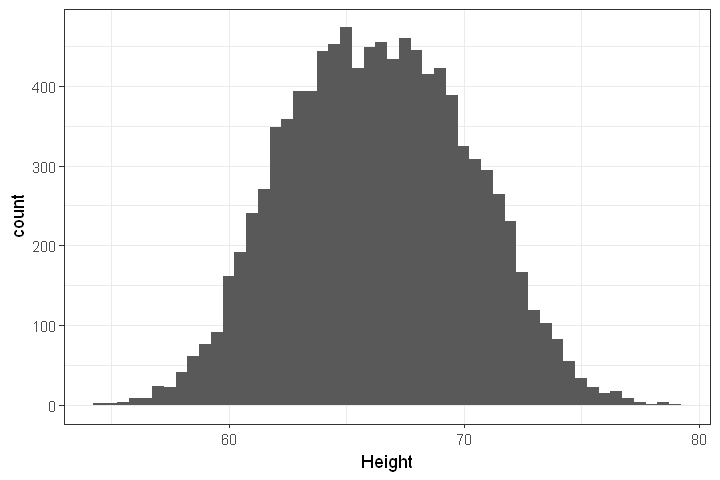

In [67]:
# lattice package has barchart etc introduced in reference book
# here I would like to practice ggplot and base plots

# try to adjust pic size with rpre
library(repr)
options(repr.plot.width=6, repr.plot.height=4)

library(ggplot2)
theme_set(theme_bw()) #black &white
ggplot(heights.weights, aes(x=Height))+geom_histogram(binwidth=0.5)

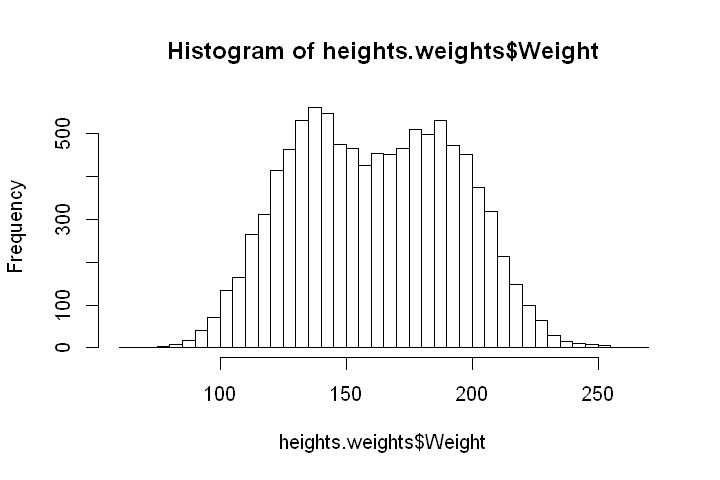

In [68]:
# compare with base plot
hist(heights.weights$Weight,breaks=50)

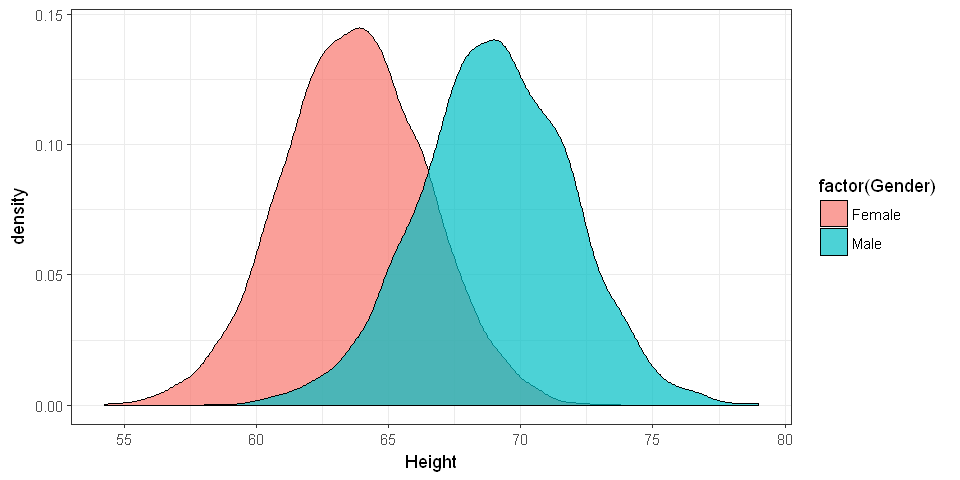

In [70]:
## Density plot
options(repr.plot.width=8, repr.plot.height=4)
ggplot(heights.weights, aes(x=Height, fill=factor(Gender)))+geom_density(alpha=0.7)
#alpha represents opacity

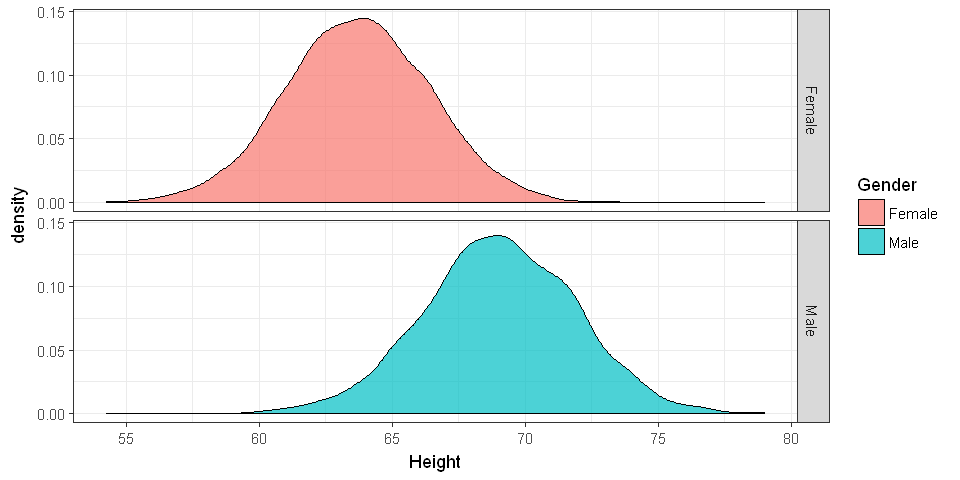

In [71]:
# facet_grid: Another way to compile two graphs

p=ggplot(heights.weights, aes(x=Height, fill=Gender))+geom_density(alpha=0.7)
p=p+facet_grid(Gender~.)
p

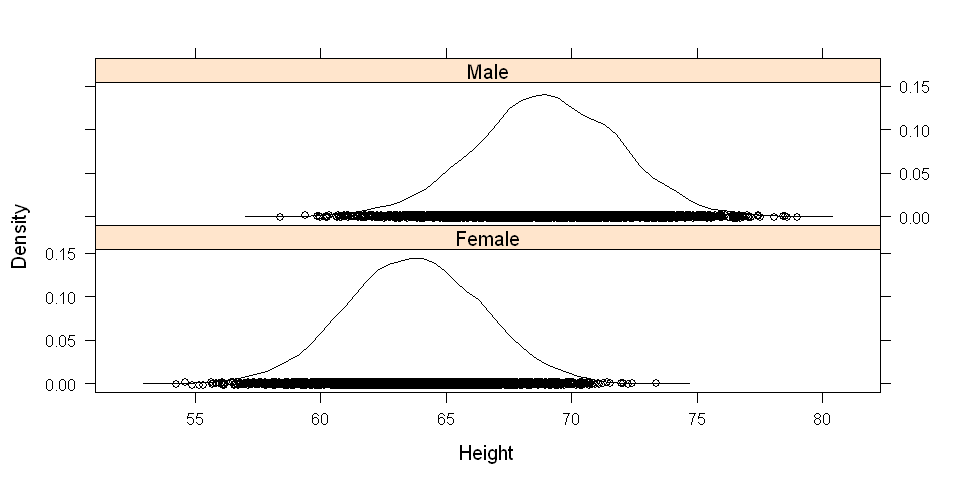

In [72]:
library(lattice) # lattice package method to do the same thing 
densityplot(~Height|Gender,data=heights.weights,layout=c(1,2),col='black')

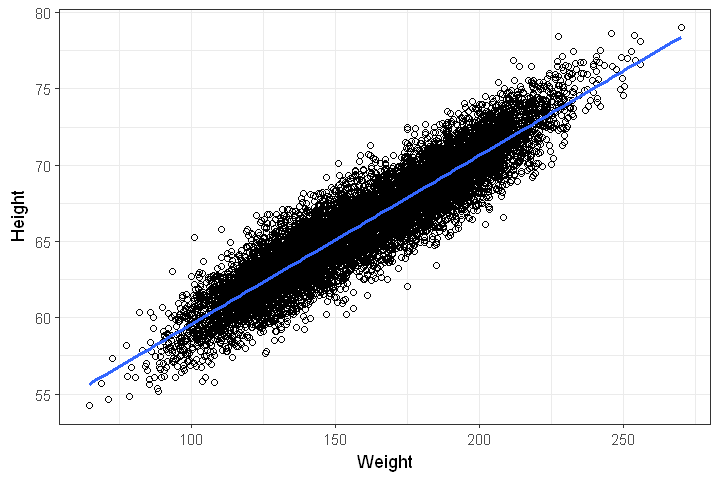

In [73]:
# scatter plot
options(repr.plot.width=6, repr.plot.height=4)
p=ggplot(heights.weights, aes(x = Weight, y = Height)) + geom_point(shape=1) # use hollow circles 
p=p+ geom_smooth(method=lm,formula=y~x,se=FALSE)  # add linear regression line
p             

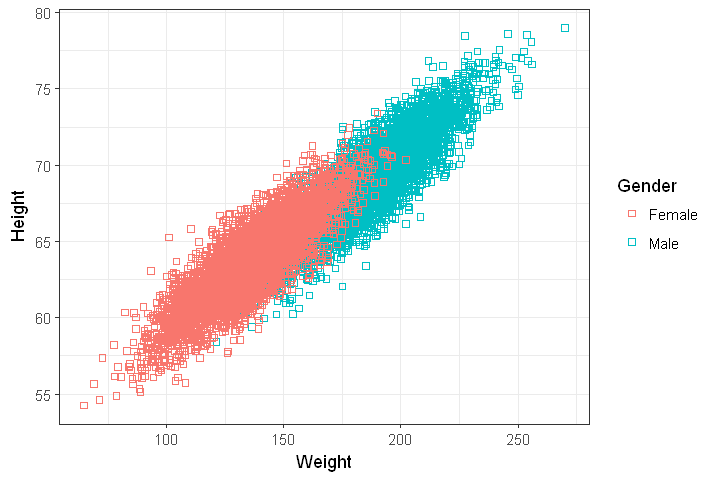

In [74]:
p=ggplot(heights.weights, aes(x = Weight, y = Height,color=Gender)) + geom_point(shape=0) # use square 
p  #cannot add a line when use geom_smooth, but two lines represents each gender class

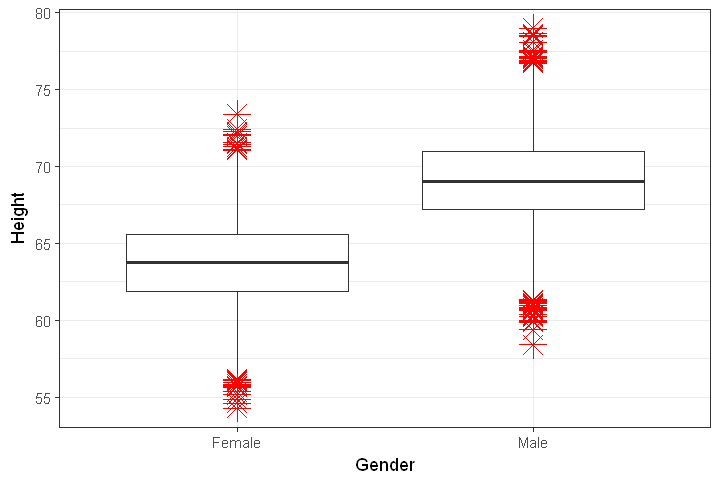

In [75]:
# Boxplot ggplot way
p=ggplot(heights.weights, aes(x = Gender, y = Height))
p=p+ geom_boxplot(outlier.colour="red", outlier.shape=8,outlier.size=5) 
p

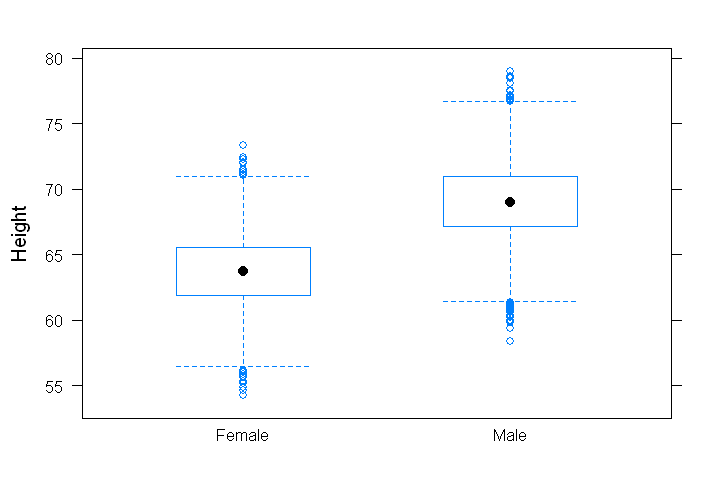

In [76]:
# Boxplot lattice way
bwplot(Height~Gender,data=heights.weights,ylab='Height')

### 6.thin-tailed v. heavy-tailed

In [30]:
set.seed(101)
normal.values=rnorm(10000,0,1)
cauchy.values=rcauchy(10000,0,1)
summary(normal.values)

     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
-3.450000 -0.662700 -0.014010  0.005278  0.680100  3.558000 

In [31]:
summary(cauchy.values)

     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
-3107.000    -0.909     0.014     2.506     1.004 21660.000 

In [33]:
dt=data.frame(X=cauchy.values,distribution='cauchy')
dt=rbind(dt,data.frame(X=normal.values,distribution='normal'))
summary(dt)

       X             distribution  
 Min.   :-3107.348   cauchy:10000  
 1st Qu.:   -0.762   normal:10000  
 Median :   -0.003                 
 Mean   :    1.255                 
 3rd Qu.:    0.795                 
 Max.   :21661.288                 

Warning message:
"Removed 995 rows containing non-finite values (stat_density)."

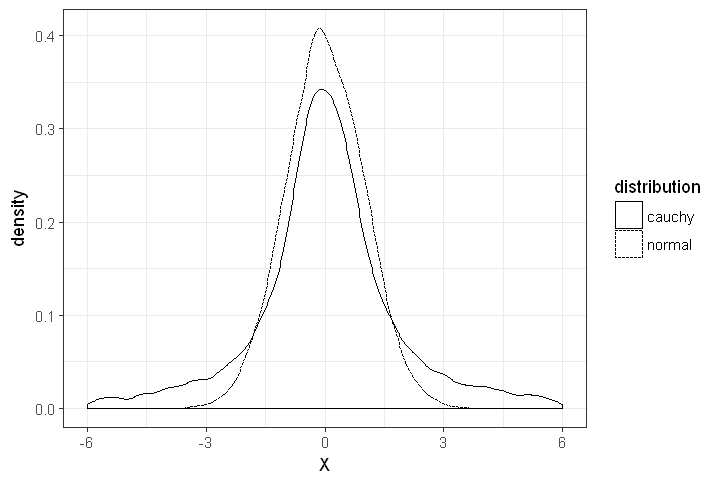

In [79]:
p=ggplot(data=dt, aes(x=X, linetype=distribution))+ geom_density()
p=p+scale_x_continuous(limits=c(-6,6)) #range of x-axis
p

### 7.Power Law

In [45]:
# import data 
data.url = 'http://www.yurulin.com/class/archive/fall2013_datamining/data/others'
data.file = sprintf('%s/Top1000names.csv',data.url)
familynames = read.csv(data.file,stringsAsFactors=FALSE)
head(familynames)

Table.with.row.headings.in.column.A.and.column.headings.in.row.2.,X,X.1,X.2,X.3,X.4,X.5,X.6,X.7,X.8,X.9
name,rank,count,prop100k,cum_prop100k,pctwhite,pctblack,pctapi,pctaian,pct2prace,pcthispanic
SMITH,1,2376206,880.85,880.85,73.35,22.22,0.4,0.85,1.63,1.56
JOHNSON,2,1857160,688.44,1569.3,61.55,33.8,0.42,0.91,1.82,1.5
WILLIAMS,3,1534042,568.66,2137.96,48.52,46.72,0.37,0.78,2.01,1.6
BROWN,4,1380145,511.62,2649.58,60.71,34.54,0.41,0.83,1.86,1.64
JONES,5,1362755,505.17,3154.75,57.69,37.73,0.35,0.94,1.85,1.44


In [46]:
# have some description in the first row and read in as column names
# column names are second row
# need to construct correct data frame form
namecount=familynames[-1,1:3]
head(namecount)

,Table.with.row.headings.in.column.A.and.column.headings.in.row.2.,X,X.1
2,SMITH,1,2376206
3,JOHNSON,2,1857160
4,WILLIAMS,3,1534042
5,BROWN,4,1380145
6,JONES,5,1362755
7,MILLER,6,1127803


In [47]:
names(namecount)=c('surname','rank','count')
namecount=namecount[order(as.numeric(namecount$count),decreasing=T),]
head(namecount)

,surname,rank,count
2,SMITH,1,2376206
3,JOHNSON,2,1857160
4,WILLIAMS,3,1534042
5,BROWN,4,1380145
6,JONES,5,1362755
7,MILLER,6,1127803


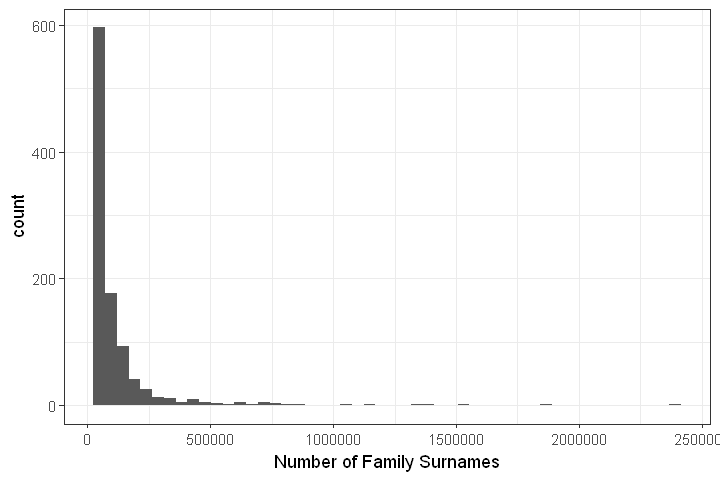

In [80]:
# ggplot provide a simple syntax for quick plot
# It's not as flexible as ggplot() way, but can be shorter in some cases.
namecount$count=as.numeric(namecount$count) # set count column data type
qplot(count,data=namecount,geom='histogram',bins=50,xlab='Number of Family Surnames')

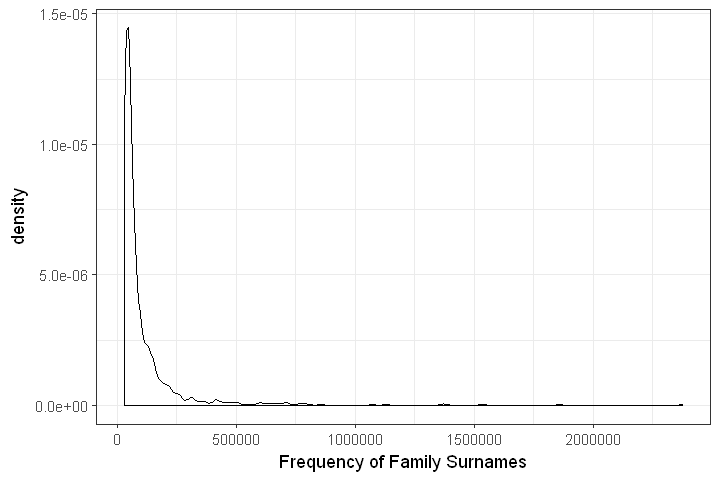

In [81]:
qplot(count,data=namecount,geom='density',xlab='Frequency of Family Surnames')

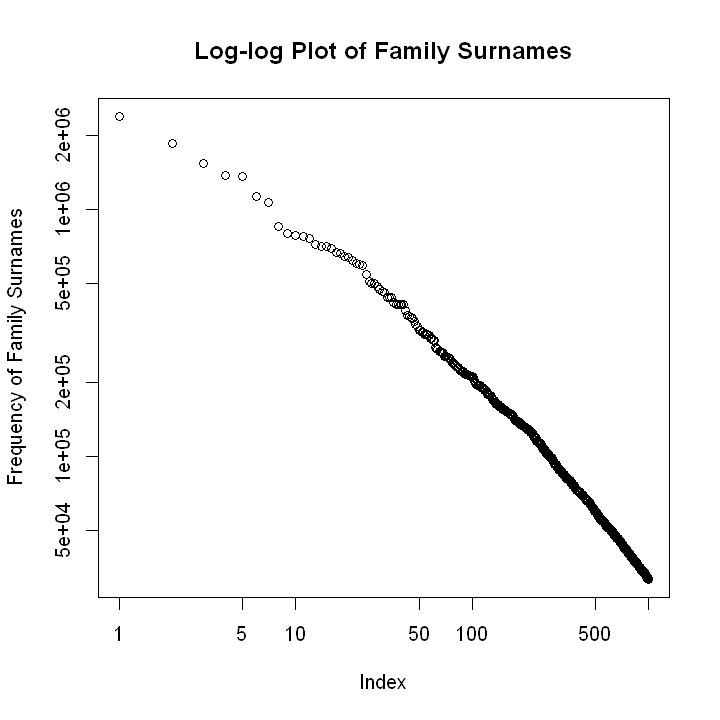

In [83]:
options(repr.plot.width=6, repr.plot.height=6)
plot(namecount$count,type='p',log='xy',
     ylab='Frequency of Family Surnames',
     xlab='Index',
     main='Log-log Plot of Family Surnames') 